In [64]:
# HW 2
# Name: Shaily Shah
# Andrew ID: shailys

import pandas as pd
import numpy as np
import statistics as stat
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import csv

In [65]:
#Part 1: Exploratory Data Analysis

with open('analytic_data2020_0.csv', newline='') as f:
    csv_reader = csv.reader(f)
    csv_headings = next(csv_reader)
    first_line = next(csv_reader)

# Read data 
analytic_data = pd.read_csv("analytic_data2020_0.csv", sep = ",", skiprows=1)
print(analytic_data.shape)
print(analytic_data.head(5))

(3194, 786)
   statecode  countycode  fipscode state          county  year  county_ranked  \
0          0           0         0    US   United States  2020            NaN   
1          1           0      1000    AL         Alabama  2020            NaN   
2          1           1      1001    AL  Autauga County  2020            1.0   
3          1           3      1003    AL  Baldwin County  2020            1.0   
4          1           5      1005    AL  Barbour County  2020            1.0   

   v001_rawvalue  v001_numerator  v001_denominator  ...  v013_rawvalue  \
0    6940.110519       3813889.0       912286150.0  ...            NaN   
1    9942.794666         81791.0        13640424.0  ...            NaN   
2    8128.591190           791.0          155856.0  ...            NaN   
3    7354.122530          2967.0          588433.0  ...            NaN   
4   10253.573403           472.0           70435.0  ...            NaN   

   v016_rawvalue  v017_rawvalue  v025_rawvalue  v026_raw

In [66]:
# Use only the raw value columns (e.g. v001_rawvalue) for your features; Remove all other columns
import re
columns = analytic_data.columns.values.tolist()
keep_columns=[]
for x in columns:
    if x.find("rawvalue") != -1:
        keep_columns.append(x)
    elif analytic_data[x].isnull().sum() == 0 and x.isalpha() == True:
        keep_columns.append(x)
print(keep_columns)

['statecode', 'countycode', 'fipscode', 'state', 'county', 'year', 'v001_rawvalue', 'v002_rawvalue', 'v036_rawvalue', 'v042_rawvalue', 'v037_rawvalue', 'v009_rawvalue', 'v011_rawvalue', 'v133_rawvalue', 'v070_rawvalue', 'v132_rawvalue', 'v049_rawvalue', 'v134_rawvalue', 'v045_rawvalue', 'v014_rawvalue', 'v085_rawvalue', 'v004_rawvalue', 'v088_rawvalue', 'v062_rawvalue', 'v005_rawvalue', 'v050_rawvalue', 'v155_rawvalue', 'v021_rawvalue', 'v069_rawvalue', 'v023_rawvalue', 'v024_rawvalue', 'v044_rawvalue', 'v082_rawvalue', 'v140_rawvalue', 'v043_rawvalue', 'v135_rawvalue', 'v125_rawvalue', 'v124_rawvalue', 'v136_rawvalue', 'v067_rawvalue', 'v137_rawvalue', 'v147_rawvalue', 'v127_rawvalue', 'v128_rawvalue', 'v129_rawvalue', 'v144_rawvalue', 'v145_rawvalue', 'v060_rawvalue', 'v061_rawvalue', 'v139_rawvalue', 'v083_rawvalue', 'v138_rawvalue', 'v039_rawvalue', 'v143_rawvalue', 'v003_rawvalue', 'v122_rawvalue', 'v131_rawvalue', 'v149_rawvalue', 'v159_rawvalue', 'v160_rawvalue', 'v063_rawvalue'

In [67]:
# Check for missing values
new_analytic_data = analytic_data[keep_columns]
print(new_analytic_data.shape)

#Columns and their null value percentage of all data. Percentages higher than 30% will be useless to explain data.
total = (new_analytic_data.isnull().sum()).sort_values(ascending=False)
percent_missing = (new_analytic_data.isnull().sum() / len(new_analytic_data)).sort_values(ascending=False)
missing_value_new_analytic_data = pd.DataFrame({'total': total,
                                 'percent_missing': percent_missing})
print(missing_value_new_analytic_data.head(50))

(3194, 113)
               total  percent_missing
v109_rawvalue   3129         0.979649
v107_rawvalue   3127         0.979023
v101_rawvalue   3125         0.978397
v117_rawvalue   3123         0.977771
v105_rawvalue   3122         0.977458
v100_rawvalue   3122         0.977458
v097_rawvalue   3121         0.977145
v103_rawvalue   3121         0.977145
v120_rawvalue   3121         0.977145
v118_rawvalue   3121         0.977145
v018_rawvalue   3121         0.977145
v019_rawvalue   3121         0.977145
v106_rawvalue   3121         0.977145
v150_rawvalue   3121         0.977145
v010_rawvalue   3121         0.977145
v099_rawvalue   3121         0.977145
v104_rawvalue   3121         0.977145
v119_rawvalue   3121         0.977145
v116_rawvalue   3121         0.977145
v027_rawvalue   3121         0.977145
v032_rawvalue   3121         0.977145
v035_rawvalue   3121         0.977145
v123_rawvalue   3121         0.977145
v008_rawvalue   3121         0.977145
v013_rawvalue   3121         0.977145


In [68]:
#Create a new dataframe of columns that have less than 40% null values as they will be useful data.
#In other words will only grab the column that will provide enough data by check if majority of the data is not null.
update_analytic_data = new_analytic_data.loc[:, new_analytic_data.isnull().mean() < .40]
print(update_analytic_data.shape)
print(update_analytic_data.dtypes)

(3194, 79)
statecode          int64
countycode         int64
fipscode           int64
state             object
county            object
                  ...   
v056_rawvalue    float64
v126_rawvalue    float64
v059_rawvalue    float64
v057_rawvalue    float64
v058_rawvalue    float64
Length: 79, dtype: object


In [69]:
#Replace all null values with the mean of the column they are in
print((update_analytic_data.isnull().sum()).sort_values(ascending=False))
update_analytic_data = update_analytic_data.fillna(update_analytic_data.mean())
update_analytic_data.isnull().sum()

v128_rawvalue    1231
v141_rawvalue    1073
v158_rawvalue    1025
v148_rawvalue     916
v061_rawvalue     860
                 ... 
v136_rawvalue       0
v060_rawvalue       0
v145_rawvalue       0
v144_rawvalue       0
statecode           0
Length: 79, dtype: int64


statecode        0
countycode       0
fipscode         0
state            0
county           0
                ..
v056_rawvalue    0
v126_rawvalue    0
v059_rawvalue    0
v057_rawvalue    0
v058_rawvalue    0
Length: 79, dtype: int64

In [70]:
#Summary Stats for each column
update_analytic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
statecode,3194.0,30.249530,15.160981,0.000000,18.000000,29.000000,45.000000,56.000000
countycode,3194.0,101.886662,107.624838,0.000000,33.000000,77.000000,133.000000,840.000000
fipscode,3194.0,30351.417032,15179.045587,0.000000,18171.500000,29174.000000,45074.500000,56045.000000
year,3194.0,2020.000000,0.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
v001_rawvalue,3194.0,8512.816075,2746.286535,2730.603992,6706.053106,8246.802260,9988.362015,43939.069406
...,...,...,...,...,...,...,...,...
v056_rawvalue,3194.0,0.096950,0.137887,0.006105,0.024087,0.044603,0.102095,0.963596
v126_rawvalue,3194.0,0.758584,0.201581,0.026913,0.639415,0.830534,0.921766,0.978872
v059_rawvalue,3194.0,0.017183,0.027790,0.000000,0.002862,0.007420,0.018997,0.303763
v057_rawvalue,3194.0,0.498970,0.022687,0.268351,0.494230,0.503148,0.510286,0.568705


In [71]:
update_analytic_data.columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'v001_rawvalue', 'v002_rawvalue', 'v036_rawvalue', 'v042_rawvalue',
       'v037_rawvalue', 'v009_rawvalue', 'v011_rawvalue', 'v133_rawvalue',
       'v070_rawvalue', 'v132_rawvalue', 'v049_rawvalue', 'v134_rawvalue',
       'v045_rawvalue', 'v014_rawvalue', 'v085_rawvalue', 'v004_rawvalue',
       'v088_rawvalue', 'v062_rawvalue', 'v005_rawvalue', 'v050_rawvalue',
       'v155_rawvalue', 'v021_rawvalue', 'v069_rawvalue', 'v023_rawvalue',
       'v024_rawvalue', 'v044_rawvalue', 'v082_rawvalue', 'v140_rawvalue',
       'v043_rawvalue', 'v135_rawvalue', 'v125_rawvalue', 'v124_rawvalue',
       'v136_rawvalue', 'v067_rawvalue', 'v137_rawvalue', 'v147_rawvalue',
       'v127_rawvalue', 'v128_rawvalue', 'v144_rawvalue', 'v145_rawvalue',
       'v060_rawvalue', 'v061_rawvalue', 'v139_rawvalue', 'v083_rawvalue',
       'v039_rawvalue', 'v143_rawvalue', 'v003_rawvalue', 'v122_rawvalue',
       'v131_rawvalue', 'v1

In [72]:
update_analytic_data.shape

(3194, 79)

<ipython-input-73-0b1cce21c315>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


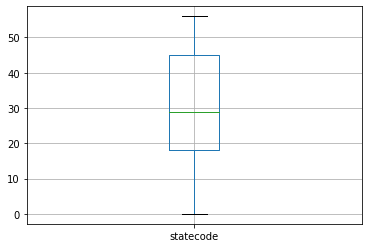

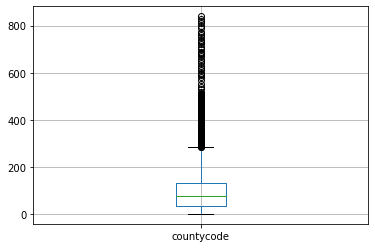

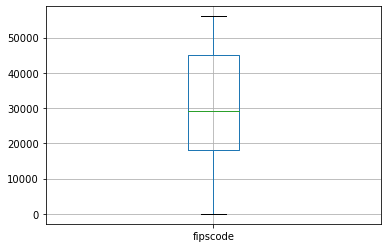

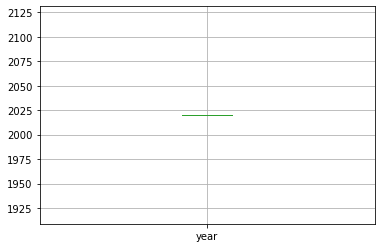

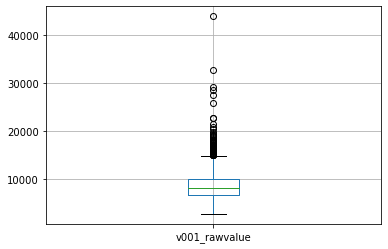

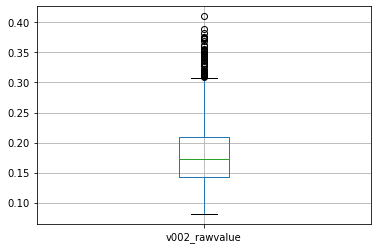

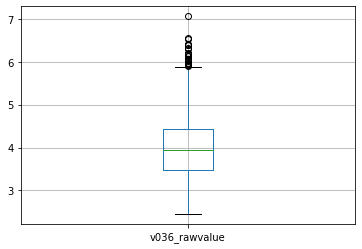

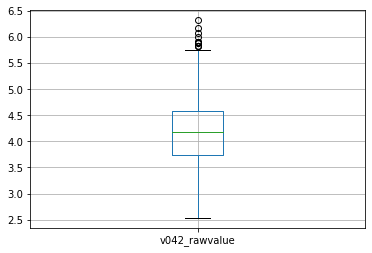

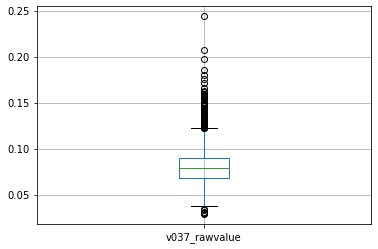

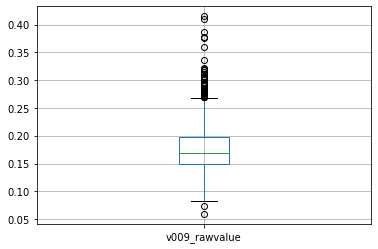

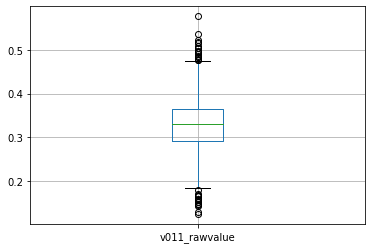

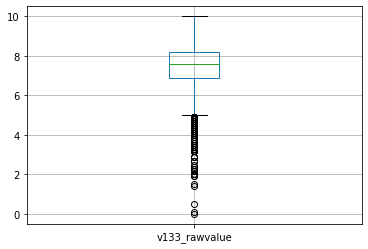

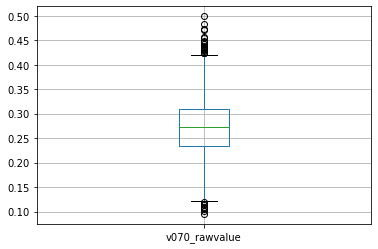

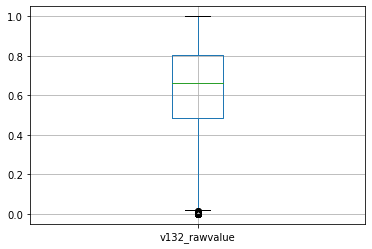

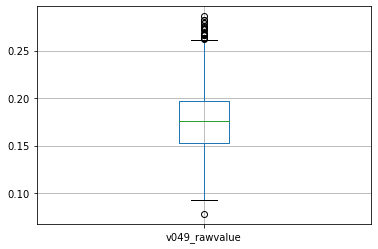

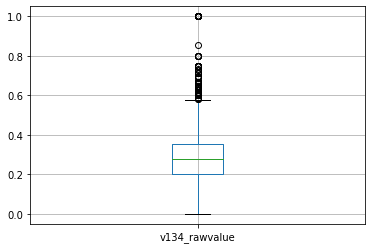

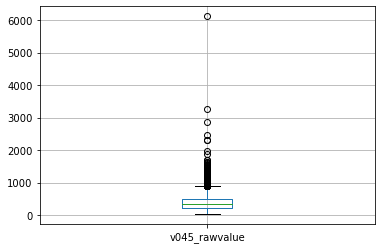

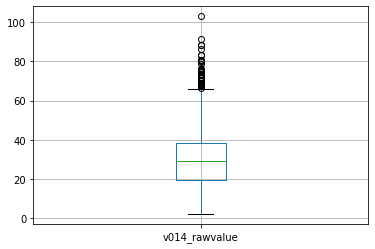

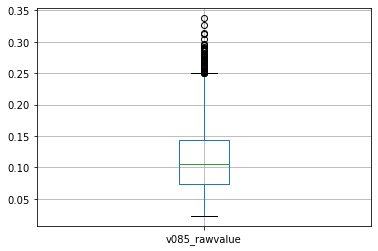

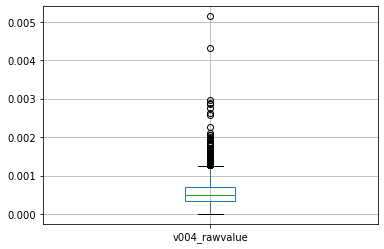

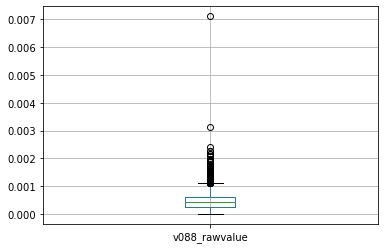

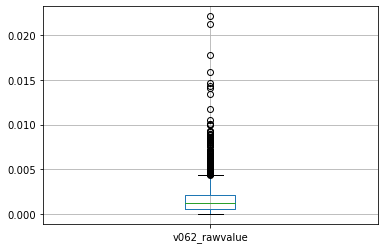

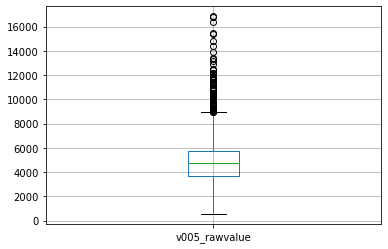

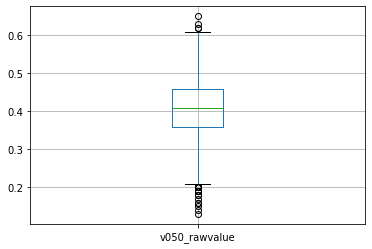

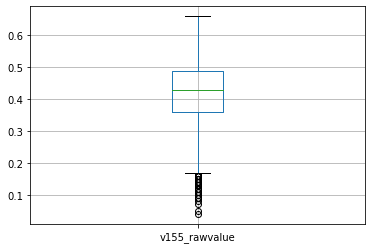

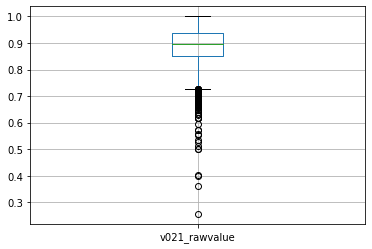

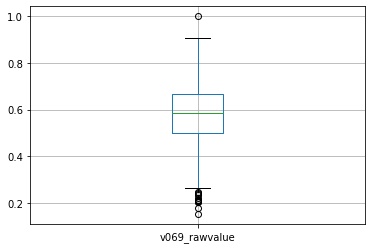

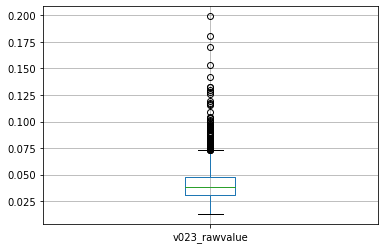

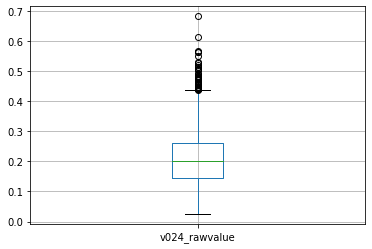

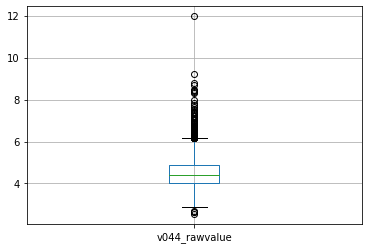

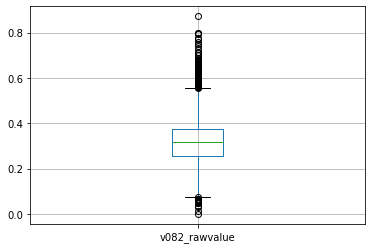

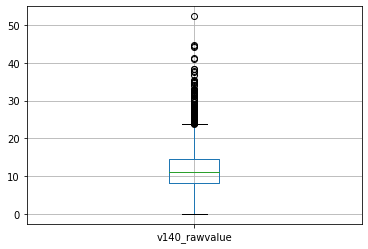

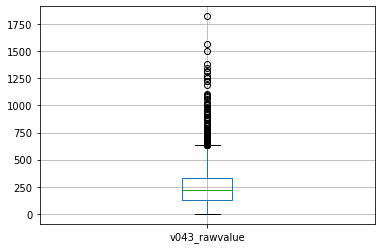

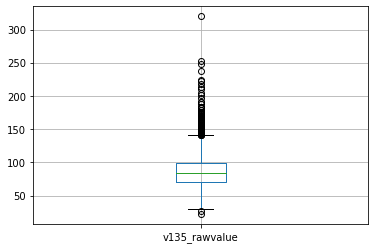

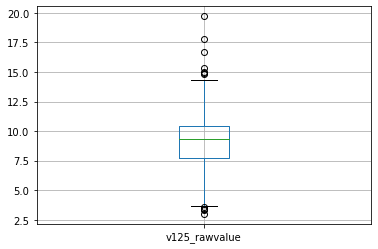

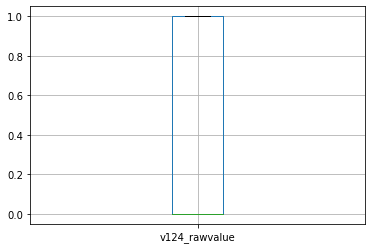

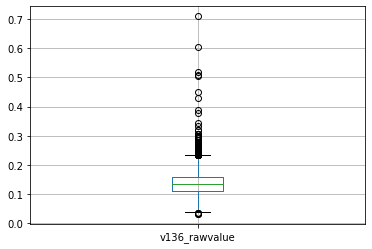

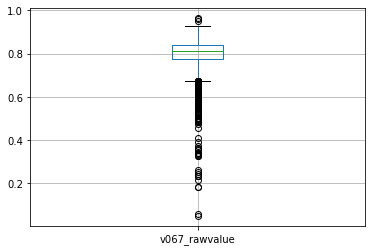

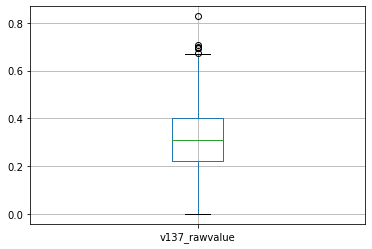

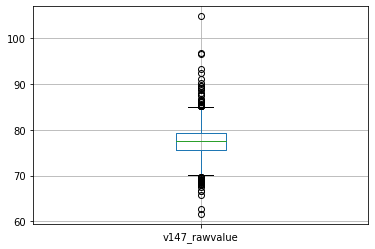

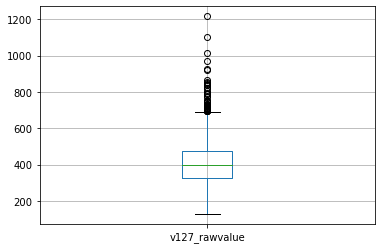

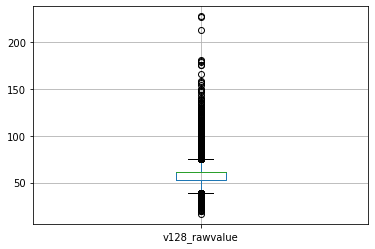

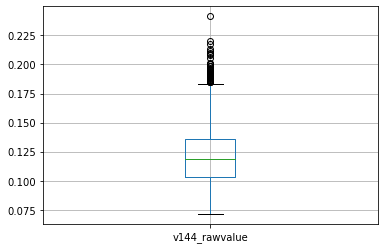

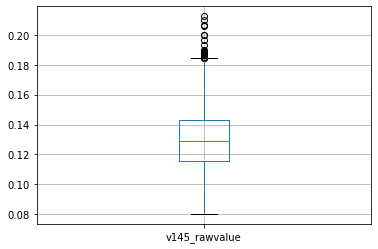

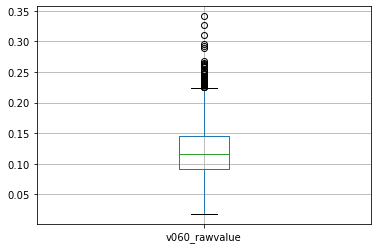

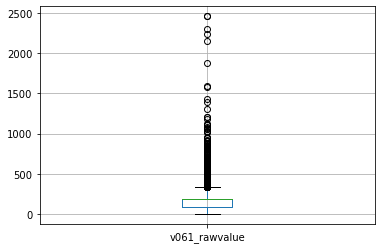

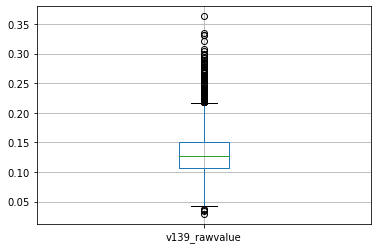

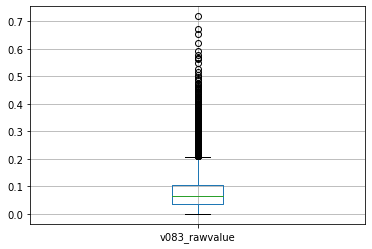

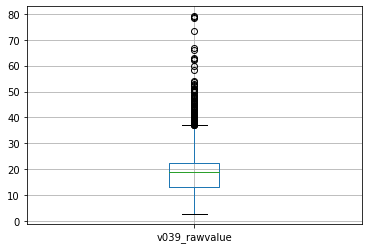

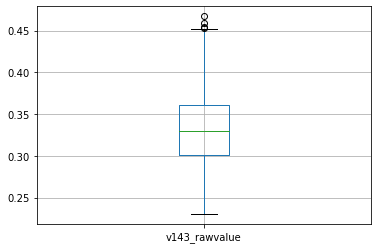

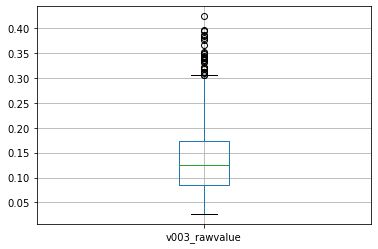

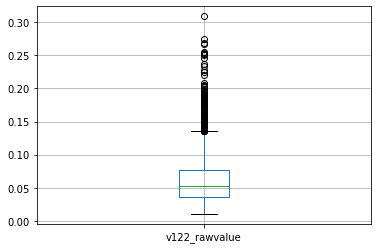

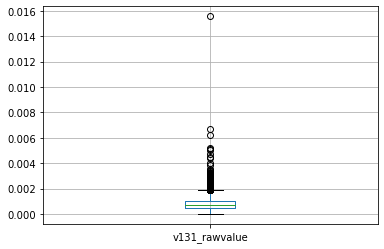

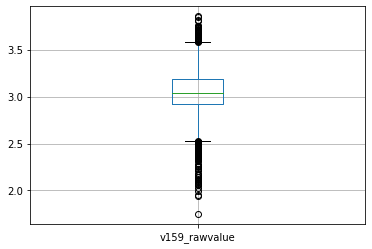

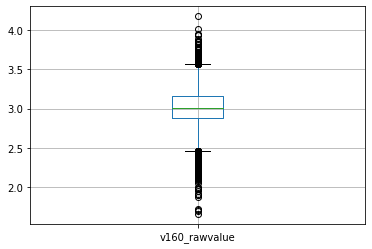

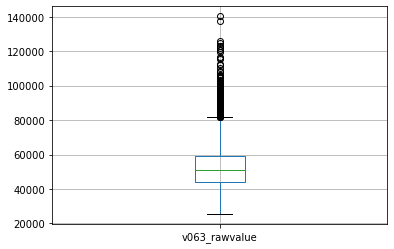

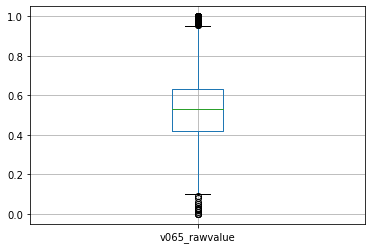

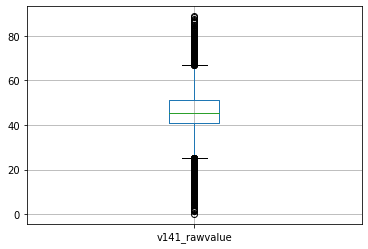

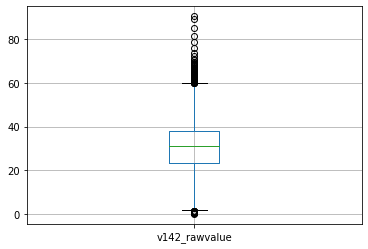

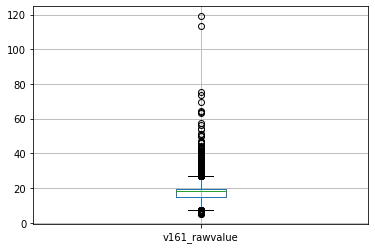

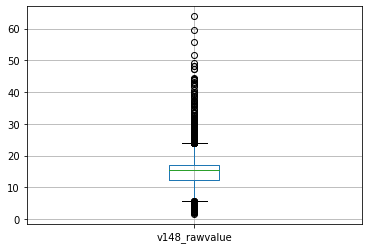

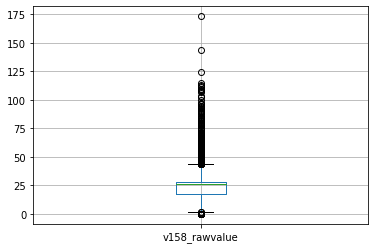

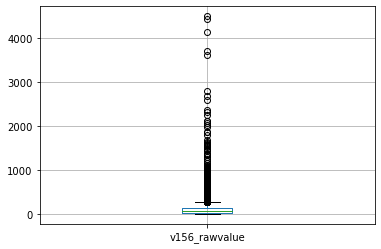

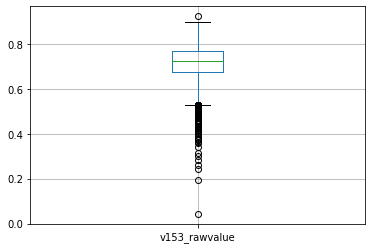

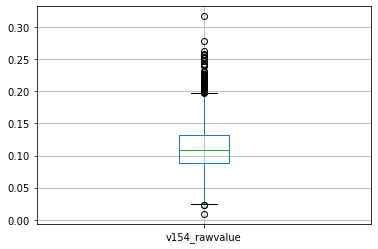

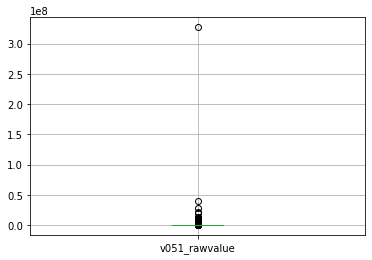

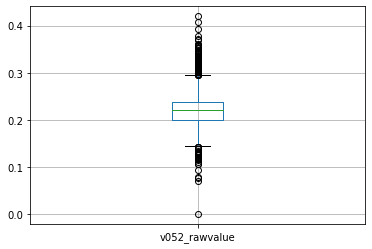

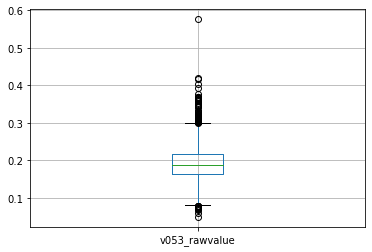

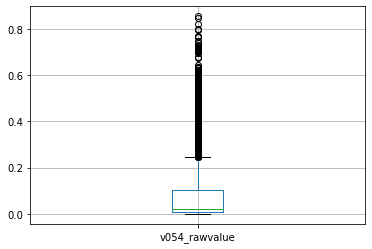

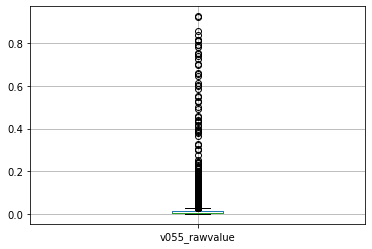

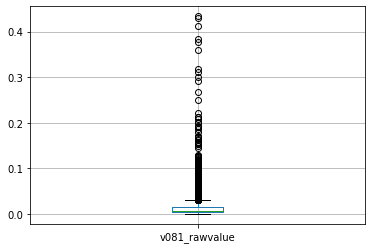

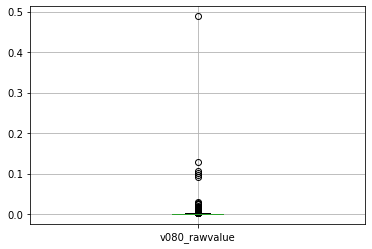

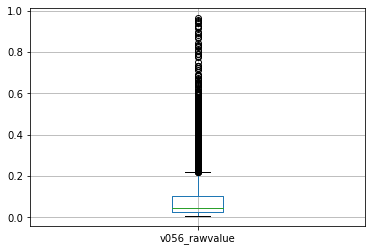

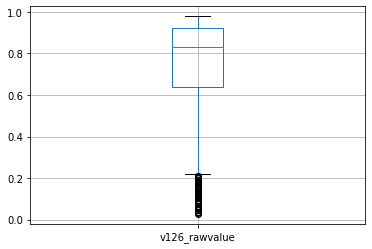

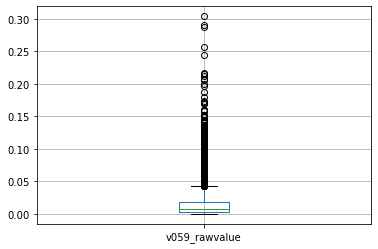

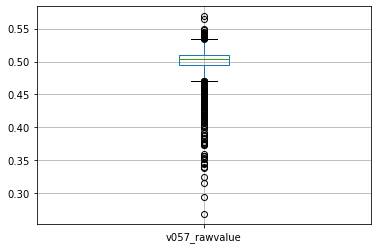

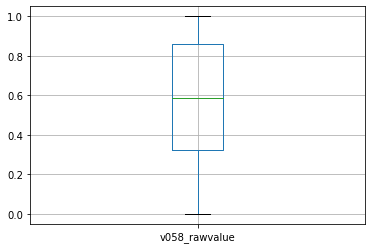

In [73]:
#Boxplots for every column to detect outliers
for column in update_analytic_data:
    if update_analytic_data[column].dtype != "O":
        plt.figure()
        update_analytic_data.boxplot([column])


In [74]:
from scipy import stats
#Find the z-score for every value in each column. Get the indices of all z-scores > 3 which are considered the outliers.
#remove outliers that are in all indexes that are in all lists only.

update_analytic_data_rawvalues = update_analytic_data.drop(['statecode','countycode','fipscode','state',
                                                                    'county','year'],axis=1)

x = np.abs(stats.zscore(update_analytic_data_rawvalues))
outliers_removed = (x<3).all(axis=1)
clean_analytic_data= update_analytic_data_rawvalues[outliers_removed]

In [75]:
clean_analytic_data

,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,...,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,9942.794666,0.220287,4.918052,4.939753,0.102549,0.209274,0.355,5.8,0.298,0.611123,...,0.169173,0.264977,0.007033,0.014969,0.001065,0.044433,0.654134,0.010610,0.516330,0.409632
2,8128.591190,0.208830,4.743889,4.654031,0.086195,0.180816,0.333,7.2,0.347,0.691301,...,0.155627,0.193432,0.004802,0.012248,0.001115,0.029658,0.743080,0.008202,0.514487,0.420022
3,7354.122530,0.175091,4.224519,4.304056,0.083450,0.174890,0.310,8.0,0.265,0.737135,...,0.204433,0.087840,0.007724,0.011503,0.000670,0.046468,0.831113,0.005435,0.515384,0.422791
4,10253.573403,0.295918,5.430279,5.185594,0.114746,0.220000,0.417,5.6,0.235,0.531668,...,0.194204,0.480326,0.006591,0.004542,0.001849,0.042764,0.456413,0.016317,0.472168,0.677896
5,11977.539484,0.194397,4.591482,4.551699,0.103087,0.191142,0.376,7.8,0.335,0.162514,...,0.164732,0.211205,0.004375,0.002366,0.001161,0.026250,0.745893,0.002682,0.467813,0.683526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,6080.222322,0.122374,3.016854,3.050548,0.078528,0.139130,0.299,8.5,0.224,0.475456,...,0.194742,0.007643,0.011923,0.007337,0.000408,0.074595,0.890248,0.005473,0.460410,1.000000
3189,7831.827655,0.148131,3.402029,3.623554,0.097052,0.180734,0.298,7.7,0.250,0.896863,...,0.121112,0.011452,0.015447,0.010104,0.001580,0.160833,0.793129,0.016332,0.485447,0.109163
3191,7330.683549,0.155375,3.628488,3.669805,0.101102,0.172127,0.358,7.4,0.272,0.840184,...,0.140795,0.006848,0.014188,0.004729,0.001478,0.092369,0.873984,0.006961,0.493325,0.430959
3192,6586.049959,0.159560,3.613308,3.682514,0.070288,0.168594,0.288,8.3,0.282,0.831829,...,0.216867,0.004692,0.018136,0.008244,0.001015,0.140520,0.824096,0.003249,0.494230,0.359545


In [76]:
#Part 2: Clustering

#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalize_analytic_data = pd.DataFrame(scaler.fit_transform(clean_analytic_data))
normalize_analytic_data.columns = clean_analytic_data.columns
print(normalize_analytic_data)

      v001_rawvalue  v002_rawvalue  v036_rawvalue  v042_rawvalue  \
0          0.813485       1.247363       1.522649       1.347570   
1         -0.062092       0.946952       1.248594       0.846767   
2         -0.435869       0.062317       0.431334       0.233343   
3          0.963475       3.230432       2.328670       1.778473   
4          1.795501       0.568524       1.008773       0.667402   
...             ...            ...            ...            ...   
2180      -1.050683      -1.319950      -1.469001      -1.963763   
2181      -0.205317      -0.644596      -0.862904      -0.959418   
2182      -0.447181      -0.454661      -0.506558      -0.878352   
2183      -0.806558      -0.344927      -0.530443      -0.856076   
2184      -1.384424      -0.875088      -0.765989      -0.894766   

      v037_rawvalue  v009_rawvalue  v011_rawvalue  v133_rawvalue  \
0          1.442531       1.158149       0.513767      -2.333757   
1          0.447785       0.213491       0.0420

In [77]:
#health_outcome_variables
health_outcome_variables = normalize_analytic_data[['v001_rawvalue','v002_rawvalue','v036_rawvalue','v037_rawvalue',
                                                'v042_rawvalue','v127_rawvalue','v128_rawvalue','v144_rawvalue',
                                                'v145_rawvalue','v147_rawvalue','v060_rawvalue','v061_rawvalue']]

# health_outcome_variables = normalize_analytic_data[['v001_rawvalue','v002_rawvalue','v036_rawvalue','v037_rawvalue',
#                                                  'v042_rawvalue']]

print(health_outcome_variables)

      v001_rawvalue  v002_rawvalue  v036_rawvalue  v037_rawvalue  \
0          0.813485       1.247363       1.522649       1.442531   
1         -0.062092       0.946952       1.248594       0.447785   
2         -0.435869       0.062317       0.431334       0.280796   
3          0.963475       3.230432       2.328670       2.184442   
4          1.795501       0.568524       1.008773       1.475280   
...             ...            ...            ...            ...   
2180      -1.050683      -1.319950      -1.469001      -0.018625   
2181      -0.205317      -0.644596      -0.862904       1.108206   
2182      -0.447181      -0.454661      -0.506558       1.354534   
2183      -0.806558      -0.344927      -0.530443      -0.519852   
2184      -1.384424      -0.875088      -0.765989      -0.787256   

      v042_rawvalue  v127_rawvalue  v128_rawvalue  v144_rawvalue  \
0          1.347570       0.795778       0.693118       1.937800   
1          0.846767       0.185393      -0.2561

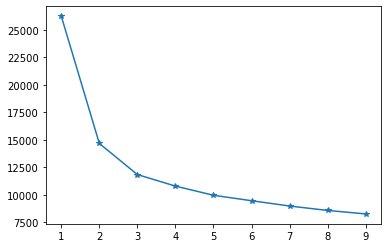

In [78]:
# List to store cluster and intra cluster distance
outcome_labels = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(health_outcome_variables)
    # append model to cluster list
    outcome_labels.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

In [79]:
#Studying the graph above reveals 2, 3, or 4 as the optimum value of K. 
#Notice from 3 to 4 the curve tends to flatten out whereas the slope 
#doesn’t observe a significant change after 2 clusters. The point where the elbow shape is created would probs be at
#3 clusters.

In [80]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(outcome_labels[i])
    print("Silhouette score:",silhouette_score(health_outcome_variables, 
                                               outcome_labels[i].predict(health_outcome_variables)))

---------------------------------------
KMeans(n_clusters=2, random_state=42)
Silhouette score: 0.35326877000188023
---------------------------------------
KMeans(n_clusters=3, random_state=42)
Silhouette score: 0.2487154647630551
---------------------------------------
KMeans(n_clusters=4, random_state=42)
Silhouette score: 0.1817345787632992
---------------------------------------
KMeans(n_clusters=5, random_state=42)
Silhouette score: 0.18436042572361233
---------------------------------------
KMeans(n_clusters=6, random_state=42)
Silhouette score: 0.1620746265961137
---------------------------------------
KMeans(n_clusters=7, random_state=42)
Silhouette score: 0.14549082670014013
---------------------------------------
KMeans(random_state=42)
Silhouette score: 0.14478861972942447
---------------------------------------
KMeans(n_clusters=9, random_state=42)
Silhouette score: 0.1454381965047288


In [81]:
from sklearn.neighbors import KNeighborsClassifier

kmeans = KMeans(n_clusters = 3)
outcome_labels = kmeans.fit_predict(health_outcome_variables)

print(outcome_labels) # will have values 0,or 1


[1 2 2 ... 0 0 0]


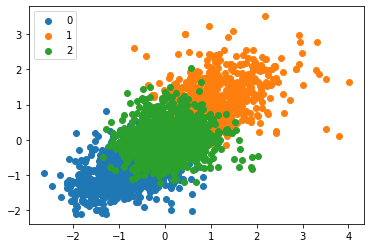

In [82]:
unique_labels = np.unique(outcome_labels)
 
#plotting the results:
 
for i in unique_labels:
    plt.scatter(health_outcome_variables.values[outcome_labels == i,0],
                health_outcome_variables.values[outcome_labels == i,1], cmap=i)
plt.legend(np.unique(outcome_labels))
plt.show()


In [83]:
clean_analytic_data['outcome_labels'] = outcome_labels
idx_list = clean_analytic_data.index

county_df = clean_analytic_data.copy()
county_df.index = idx_list

for idx in idx_list:
    county_df.loc[idx,"countycode"]=update_analytic_data.loc[idx,'countycode']
    
county_df

<ipython-input-83-a0cabb76028a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analytic_data['outcome_labels'] = outcome_labels


,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,...,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue,outcome_labels,countycode
1,9942.794666,0.220287,4.918052,4.939753,0.102549,0.209274,0.355,5.8,0.298,0.611123,...,0.007033,0.014969,0.001065,0.044433,0.654134,0.010610,0.516330,0.409632,1,0.0
2,8128.591190,0.208830,4.743889,4.654031,0.086195,0.180816,0.333,7.2,0.347,0.691301,...,0.004802,0.012248,0.001115,0.029658,0.743080,0.008202,0.514487,0.420022,2,1.0
3,7354.122530,0.175091,4.224519,4.304056,0.083450,0.174890,0.310,8.0,0.265,0.737135,...,0.007724,0.011503,0.000670,0.046468,0.831113,0.005435,0.515384,0.422791,2,3.0
4,10253.573403,0.295918,5.430279,5.185594,0.114746,0.220000,0.417,5.6,0.235,0.531668,...,0.006591,0.004542,0.001849,0.042764,0.456413,0.016317,0.472168,0.677896,1,5.0
5,11977.539484,0.194397,4.591482,4.551699,0.103087,0.191142,0.376,7.8,0.335,0.162514,...,0.004375,0.002366,0.001161,0.026250,0.745893,0.002682,0.467813,0.683526,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,6080.222322,0.122374,3.016854,3.050548,0.078528,0.139130,0.299,8.5,0.224,0.475456,...,0.011923,0.007337,0.000408,0.074595,0.890248,0.005473,0.460410,1.000000,0,35.0
3189,7831.827655,0.148131,3.402029,3.623554,0.097052,0.180734,0.298,7.7,0.250,0.896863,...,0.015447,0.010104,0.001580,0.160833,0.793129,0.016332,0.485447,0.109163,0,37.0
3191,7330.683549,0.155375,3.628488,3.669805,0.101102,0.172127,0.358,7.4,0.272,0.840184,...,0.014188,0.004729,0.001478,0.092369,0.873984,0.006961,0.493325,0.430959,0,41.0
3192,6586.049959,0.159560,3.613308,3.682514,0.070288,0.168594,0.288,8.3,0.282,0.831829,...,0.018136,0.008244,0.001015,0.140520,0.824096,0.003249,0.494230,0.359545,0,43.0


In [84]:
cluster0 = []
cluster1 = []
cluster2 = []

for counties in county_df['countycode']:
    if counties in (county_df['outcome_labels']==0):
        cluster0.append(counties)
    
for counties in county_df['countycode']:
    if counties in (county_df['outcome_labels']==1):
        cluster1.append(counties)

for counties in county_df['countycode']:
    if counties in (county_df['outcome_labels']==2):
        cluster2.append(counties)

print(cluster0,"\n")
print(cluster1,"\n")
print(cluster2,"\n")

#All counties in cluster 0 have similar health outcomes and behaviors and same goes for cluster 1 and cluster 2.

[1.0, 3.0, 5.0, 9.0, 13.0, 15.0, 17.0, 21.0, 23.0, 27.0, 29.0, 31.0, 39.0, 41.0, 43.0, 49.0, 53.0, 55.0, 57.0, 59.0, 69.0, 77.0, 81.0, 107.0, 111.0, 113.0, 115.0, 121.0, 125.0, 127.0, 129.0, 122.0, 130.0, 170.0, 275.0, 3.0, 11.0, 13.0, 15.0, 21.0, 1.0, 5.0, 11.0, 13.0, 15.0, 21.0, 23.0, 27.0, 29.0, 31.0, 37.0, 43.0, 49.0, 53.0, 55.0, 57.0, 59.0, 65.0, 81.0, 99.0, 101.0, 105.0, 111.0, 113.0, 115.0, 121.0, 125.0, 127.0, 129.0, 131.0, 139.0, 141.0, 143.0, 145.0, 5.0, 9.0, 15.0, 17.0, 21.0, 23.0, 43.0, 49.0, 55.0, 65.0, 99.0, 111.0, 115.0, 1.0, 5.0, 9.0, 17.0, 41.0, 49.0, 59.0, 69.0, 77.0, 81.0, 99.0, 101.0, 105.0, 115.0, 121.0, 123.0, 125.0, 1.0, 3.0, 5.0, 9.0, 11.0, 13.0, 15.0, 1.0, 3.0, 5.0, 3.0, 5.0, 9.0, 13.0, 21.0, 23.0, 35.0, 37.0, 41.0, 43.0, 49.0, 53.0, 57.0, 59.0, 69.0, 81.0, 99.0, 101.0, 105.0, 107.0, 111.0, 113.0, 121.0, 127.0, 129.0, 131.0, 1.0, 3.0, 5.0, 9.0, 11.0, 13.0, 15.0, 17.0, 23.0, 27.0, 29.0, 31.0, 35.0, 39.0, 55.0, 57.0, 69.0, 77.0, 81.0, 105.0, 107.0, 111.0, 115.0, 

In [85]:
health_behaviors_variables =normalize_analytic_data[['v009_rawvalue','v011_rawvalue','v133_rawvalue',
                                                 'v070_rawvalue','v132_rawvalue','v049_rawvalue',
                                                 'v045_rawvalue','v014_rawvalue','v139_rawvalue',
                                                 'v039_rawvalue','v083_rawvalue','v143_rawvalue']]

print(health_behaviors_variables)

      v009_rawvalue  v011_rawvalue  v133_rawvalue  v070_rawvalue  \
0          1.158149       0.513767      -2.333757       0.433206   
1          0.213491       0.042076      -0.587632       1.365736   
2          0.016804      -0.451055       0.410154      -0.194824   
3          1.514208       1.843077      -2.583203      -0.765760   
4          0.556276       0.964017       0.160707       1.137361   
...             ...            ...            ...            ...   
2180      -1.170258      -0.686900       1.033770      -0.975104   
2181       0.210791      -0.708341       0.035984      -0.480292   
2182      -0.074933       0.578089      -0.338186      -0.061605   
2183      -0.192202      -0.922746       0.784323       0.128707   
2184      -0.247394       0.042076       0.285431      -0.118699   

      v132_rawvalue  v049_rawvalue  v045_rawvalue  v014_rawvalue  \
0         -0.137545      -1.275118       1.368364       0.230866   
1          0.256016      -0.897400       0.2614

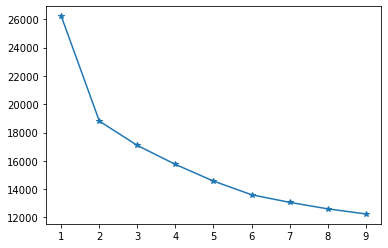

In [86]:
# List to store cluster and intra cluster distance
behavior_labels = []
inertia = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K 
# are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(health_behaviors_variables)
    # append model to labels list
    behavior_labels.append(model)
    inertia.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(1,10,1),inertia,marker='*')
plt.show()

In [87]:
#Studying the graph above reveals 2, 3, or 4 as the optimum value of K. 
#Notice from 3 to 4 the curve tends to flatten out whereas the slope 
#doesn’t observe a significant change after 2 clusters. The point where the elbow shape is created would probs be at
#2 clusters.

In [88]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(behavior_labels[i])
    print("Silhouette score:",silhouette_score(health_behaviors_variables, 
                                               behavior_labels[i].predict(health_behaviors_variables)))

---------------------------------------
KMeans(n_clusters=2, random_state=42)
Silhouette score: 0.2480896519539071
---------------------------------------
KMeans(n_clusters=3, random_state=42)
Silhouette score: 0.14196777036589683
---------------------------------------
KMeans(n_clusters=4, random_state=42)
Silhouette score: 0.14781476412974784
---------------------------------------
KMeans(n_clusters=5, random_state=42)
Silhouette score: 0.14384339110528976
---------------------------------------
KMeans(n_clusters=6, random_state=42)
Silhouette score: 0.13881265338426485
---------------------------------------
KMeans(n_clusters=7, random_state=42)
Silhouette score: 0.11950015331569039
---------------------------------------
KMeans(random_state=42)
Silhouette score: 0.12339934282607931
---------------------------------------
KMeans(n_clusters=9, random_state=42)
Silhouette score: 0.11363248190347153


In [89]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
behavior_labels = kmeans.fit_predict(health_behaviors_variables)

print(behavior_labels) # will have values 0,1,or 2

[1 1 0 ... 0 0 0]


No handles with labels found to put in legend.


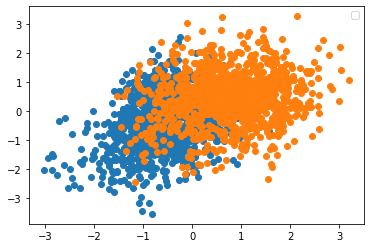

In [90]:
unique_labels = np.unique(behavior_labels)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(health_behaviors_variables.values[behavior_labels == i,0],
                health_behaviors_variables.values[behavior_labels == i,1], cmap=i)
plt.legend()
plt.show()

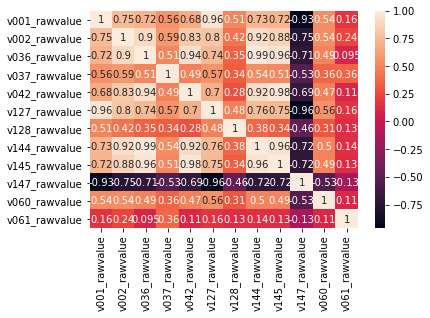

In [91]:
import seaborn as sn

corrMatrix = health_outcome_variables.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (8,3)
plt.show()

In [94]:
#Step 3: Supervised Learning - models: kNN and Decision tree

#The five most important factors predicting premature death as shown by this correlation matrix would be the 
#v127_rawvalue, v147_rawvalue, v144_rawvalue, v145_rawvalue, v036_rawvalue variables because any cofficient closest to
# 1 and -1 indicates a perfectly positive (negative) linear correlation between two variables.
#which are premature death, poor physical health days, poor physical health days, poor mental health days
#and Low birthweight.

#Preprocessing
health_outcome_variables['labels'] = outcome_labels #add labels for model 
factors_pred_premature_death = health_outcome_variables[['v127_rawvalue', 'v147_rawvalue', 'v144_rawvalue', 
                                                         'v145_rawvalue', 'v036_rawvalue', 'labels']]

X = factors_pred_premature_death.iloc[:, :-1]
y = factors_pred_premature_death.iloc[:, -1]
#Creating training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<ipython-input-94-43b71d7f9a2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_outcome_variables['labels'] = outcome_labels #add labels for model


In [95]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)
coeff_df = pd.DataFrame(linear.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred=linear.predict(X_test)

               Coefficient
v127_rawvalue    -0.162147
v147_rawvalue    -0.297014
v144_rawvalue    -0.696388
v145_rawvalue     0.439932
v036_rawvalue     0.548079


In [96]:
#Find best k for kNN regressor
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [101]:
#according to the elbow curve the best param for k is at k = 12
kNN = neighbors.KNeighborsRegressor(n_neighbors = 9)
kNN.fit(X_train, y_train)  #fit the model
y_pred=kNN.predict(X_test) #make prediction on test set


In [102]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

#training the classifier and make predictions
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train) 
y_prediction = dt.predict(X_test)


In [106]:
# Part 4: Better Model

#kNN regressor MSE
print("knn MSE:", mean_squared_error(y_test,y_pred))

#Decision Tree MSE
print("Decision Tree MSE:",mean_squared_error(y_test,y_prediction))

knn MSE: 0.1164505466564963
Decision Tree MSE: 0.2402745995423341


In [104]:
#Between kNN and Decision Tree Regressor models, the kNN model seems to be more accurate because its MSE is lower.